In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_data_dir = '/content/drive/My Drive/2020-Projet_E3-Deep learning/chest_xray/train'
validation_data_dir = '/content/drive/My Drive/2020-Projet_E3-Deep learning/chest_xray/val'
test_data_dir = '/content/drive/My Drive/2020-Projet_E3-Deep learning/chest_xray/test'

# Exploration des données

In [4]:
import cv2
import matplotlib.pyplot as plt

## Visualisation de quelques radios :

In [5]:
def plot_lignes(sain,malade, gray=False) :
    if gray :
        fig, axes = plt.subplots(len(sain), 2, figsize=(13, 8))
        ax = axes.ravel()
        n = 0
        for i in range(len(sain)) :
            ax[n].imshow(sain[i], cmap='gray')
            ax[n].set_title("Patient normal")
            n+=1
            ax[n].imshow(malade[i],cmap='gray')
            ax[n].set_title("Patient malade")
            n+=1
    else :
        fig, axes = plt.subplots(len(sain), 2, figsize=(13, 8))
        ax = axes.ravel()
        n = 0
        for i in range(len(sain)) :
            ax[n].imshow(sain[i])
            ax[n].set_title("Patient normal")
            n+=1
            ax[n].imshow(malade[i])
            ax[n].set_title("Patient malade")
            n+=1

In [6]:
normal1 = "/content/drive/MyDrive/2020-Projet_E3-Deep learning/chest_xray/test/NORMAL/IM-0001-0001.jpeg"
normal2 = "/content/drive/MyDrive/2020-Projet_E3-Deep learning/chest_xray/test/NORMAL/IM-0003-0001.jpeg"
normal3 = "/content/drive/MyDrive/2020-Projet_E3-Deep learning/chest_xray/test/NORMAL/IM-0005-0001.jpeg"

malade1 = "/content/drive/MyDrive/2020-Projet_E3-Deep learning/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg"
malade2 = "/content/drive/MyDrive/2020-Projet_E3-Deep learning/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg"
malade3 = "/content/drive/MyDrive/2020-Projet_E3-Deep learning/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg"

norm1 = cv2.imread(normal1)
norm2 = cv2.imread(normal2)
norm3 = cv2.imread(normal3)

mal1 = cv2.imread(malade1)
mal2 = cv2.imread(malade2)
mal3 = cv2.imread(malade3)

sain = [norm1, norm2, norm3]
malade = [mal1, mal2, mal3]

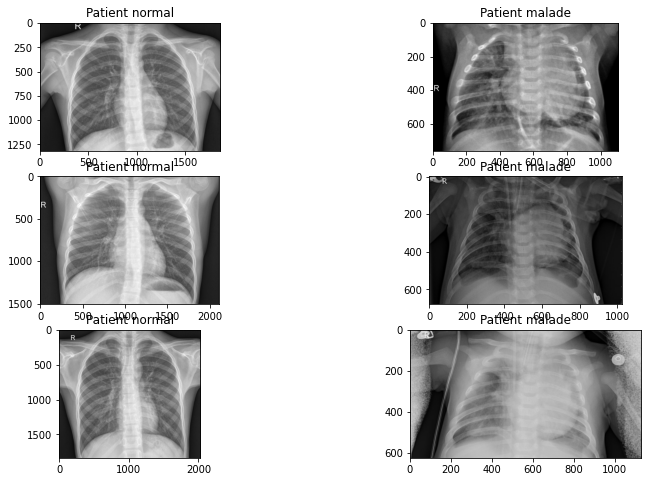

In [7]:
plot_lignes(sain, malade)

## Vérification des histogrammes de couleurs

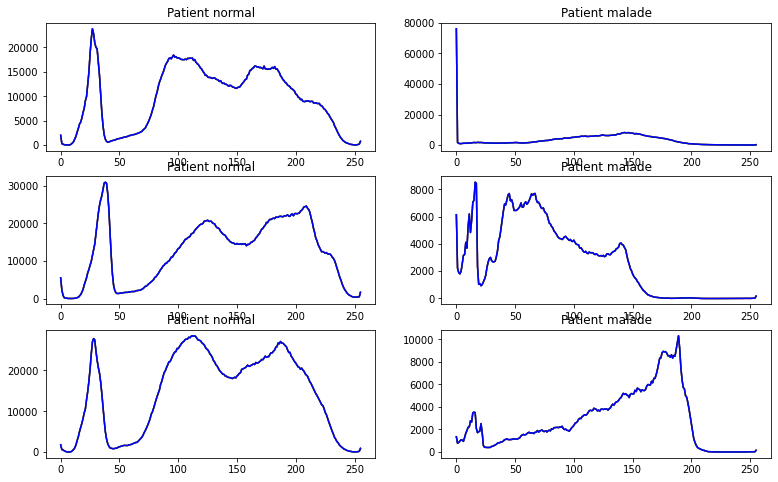

In [8]:
color = ('r','g','b')
n = 0
fig, axes = plt.subplots(len(sain), 2, figsize=(13, 8))
ax = axes.ravel()

for i in range(len(sain)) :
    for channel,col in enumerate(color):
        histo_sain = cv2.calcHist([sain[i]],[channel],None,[256],[0,256])
        ax[n].plot(histo_sain,color = col)
        ax[n].set_title("Patient normal")
    n+=1
    for channel,col in enumerate(color):
        histo_malade = cv2.calcHist([malade[i]],[channel],None,[256],[0,256])
        ax[n].plot(histo_malade,color = col)
        ax[n].set_title("Patient malade")
    n+=1

On voit que les histogrammes des 3 couleurs sont les mêmes ! 
On va donc passer en niveau de gris.

## Visualisation des nouvelles images en niveau de gris

In [9]:
sain_gray = []
malade_gray = []

for i in range(len(sain)) :
    sain_gray.append(cv2.cvtColor(sain[i], cv2.COLOR_RGB2GRAY))
    malade_gray.append(cv2.cvtColor(malade[i], cv2.COLOR_RGB2GRAY))

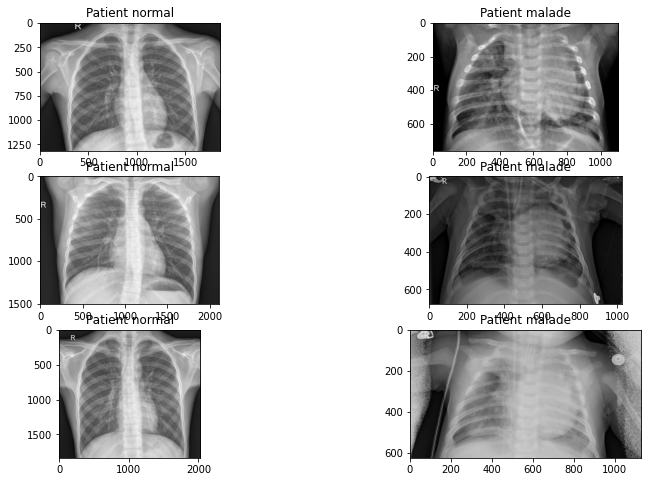

In [10]:
plot_lignes(sain_gray, malade_gray, gray = True)

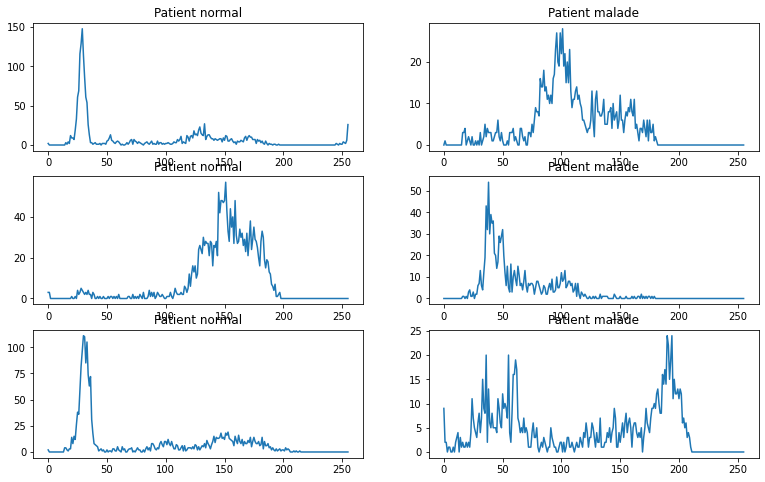

In [11]:
n = 0
fig, axes = plt.subplots(len(sain), 2, figsize=(13, 8))
ax = axes.ravel()

for i in range(len(sain)) :
    hist = cv2.calcHist(sain_gray[i], [0], None, [256], [0,256])
    ax[n].plot(hist)
    ax[n].set_title("Patient normal")
    n+=1
    hist = cv2.calcHist(malade_gray[i],[0],None,[256],[0,256])
    ax[n].plot(hist)
    ax[n].set_title("Patient malade")
    n+=1

## Tentative d'équilibrage des histogrammes

In [12]:
sain_equa = []
malade_equa = []

for i in range(len(sain)) :
    sain_equa.append(cv2.equalizeHist(sain_gray[i]))
    malade_equa.append(cv2.equalizeHist(malade_gray[i]))

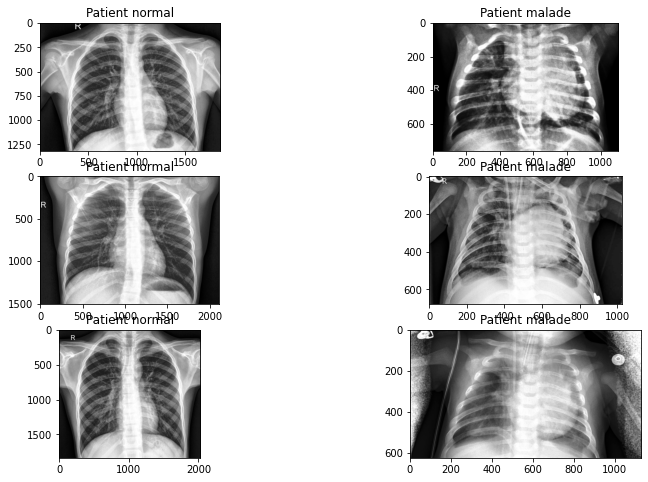

In [13]:
plot_lignes(sain_equa, malade_equa, gray = True)

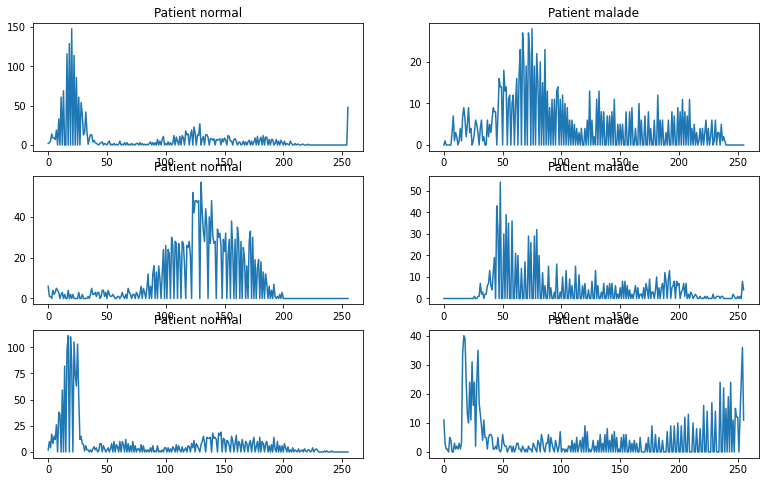

In [14]:
n = 0
fig, axes = plt.subplots(len(sain), 2, figsize=(13, 8))
ax = axes.ravel()

for i in range(len(sain)) :
    hist = cv2.calcHist(sain_equa[i], [0], None, [256], [0,256])
    ax[n].plot(hist)
    ax[n].set_title("Patient normal")
    n+=1
    hist = cv2.calcHist(malade_equa[i],[0],None,[256],[0,256])
    ax[n].plot(hist)
    ax[n].set_title("Patient malade")
    n+=1

## Application d'un filtre Clahe 

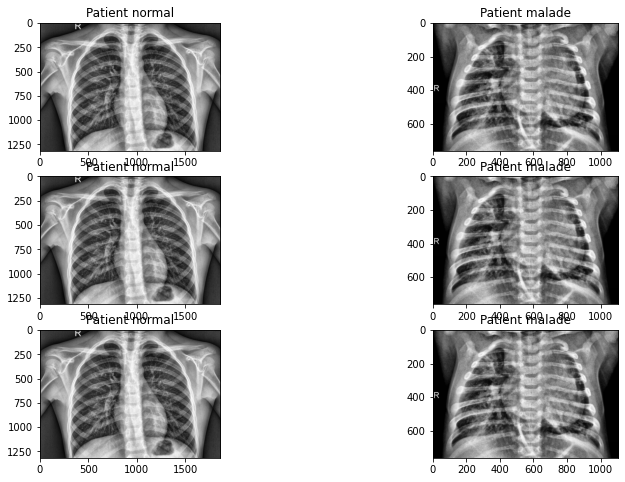

In [15]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
sain_clahe = []
malade_clahe = []

for i in range(len(sain)) :
    sain_clahe.append(clahe.apply(sain_gray[0]))
    malade_clahe.append(clahe.apply(malade_gray[0]))

plot_lignes(sain_clahe, malade_clahe, gray = True)

## Vérification de la balance des classes :

In [16]:
import os

normal = os.listdir("/content/drive/MyDrive/2020-Projet_E3-Deep learning/chest_xray/test/NORMAL") + os.listdir("/content/drive/MyDrive/2020-Projet_E3-Deep learning/chest_xray/train/NORMAL") + os.listdir("/content/drive/MyDrive/2020-Projet_E3-Deep learning/chest_xray/val/NORMAL")
malade = os.listdir("/content/drive/MyDrive/2020-Projet_E3-Deep learning/chest_xray/test/PNEUMONIA") + os.listdir("/content/drive/MyDrive/2020-Projet_E3-Deep learning/chest_xray/train/PNEUMONIA") + os.listdir("/content/drive/MyDrive/2020-Projet_E3-Deep learning/chest_xray/val/PNEUMONIA")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


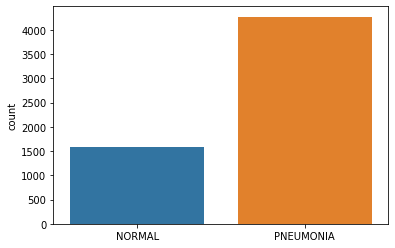

In [17]:
import seaborn as sns

count = []

for i in normal :
    count.append('NORMAL')
for i in malade :
    count.append('PNEUMONIA')

sns.countplot(count)

On voit que les classes sont mal équilibrées...

# Définition et entrainement des différents modèles/réseaux de neurones

Idées :
- Modèle à plusieurs entrées ()   
- Bagging
- Changer la métrique d'évaluation (accuracy pas optimal pour un jeu de données avec des classes mal équilibrées)

Lors de l'industrialisation :    
- entrainement du modèle avec base d'entrainement/test/validation
- lors de la mise en production : entrainement avec l'ensemble des données du modèle sélectionné

In [4]:
from model import *

## Réseau de neurones convolutif

In [5]:
classifier = MachineLearningClassifier(15, nb_train_samples=5212, nb_validation_samples=16, class_mode = 'binary', batch_size = 64, img_shape = (150,150,3), train_dir = train_data_dir, test_dir = test_data_dir, val_dir = validation_data_dir)
classifier.generateur_data()

classifier.cnn()
classifier.compile()

classifier.fit_gen()

Found 5212 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/15
81/81 [==============================] - 111s 1s/step - loss: 0.4629 - accuracy: 0.7887 - val_loss: 0.6174 - val_accuracy: 0.7500
Epoch 2/15
81/81 [==============================] - 104s 1s/step - loss: 0.2919 - accuracy: 0.8685 - val_loss: 0.4568 - val_accuracy: 0.8125
Epoch 3/15
81/81 [==============================] - 104s 1s/step - loss: 0.2523 - accuracy: 0.8937 - val_loss: 1.1032 - val_accuracy: 0.5625
Epoch 4/15
81/81 [==============================] - 104s 1s/step - loss: 0.2372 - accuracy: 0.9038 - val_loss: 0.8762 - val_accuracy: 0.5625
Epoch 5/15
81/81 [==============================] - 104s 1s/step - loss: 0.2323 - accuracy: 0.9118 - val_loss: 0.3952 - val_accuracy: 0.8750
Epoch 6/15
81/81 [==============================] - 104s 1s/step - loss: 0.2099 - accuracy: 0.9202 - val_loss: 0.3004 - val_accuracy: 0.8125
Epoch 7/15
81/81 [=============

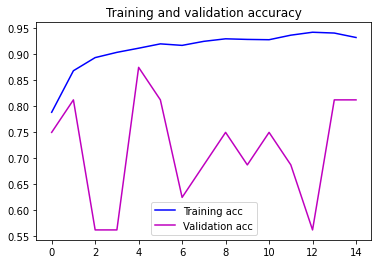

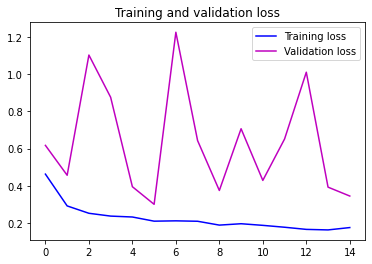

In [6]:
classifier.print_history()

In [7]:
classifier.interpretation_model()

/content/model.py:296: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = (self.model.predict_generator(self.test_generator,steps = nb_samples) > 0.5).astype("int32")


Predicted    0    1
Actual             
0           82  152
1          128  262
